In [3]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
#from __future__ import print_function
%matplotlib inline
fs=20
font={'family' : 'serif', 'size' : fs}  #define font for legend\\n\",\n",
plt.rc('font', **font)

In [4]:
import sys
climber_path='/home/peter/PIK/climber/'#/home/peter/PIK/climber
sys.path.append(climber_path+"data_preparation/PMIP/P_hum/")
from only_create_P_hum_file_script_homogeneous import r, regions
from only_create_P_hum_file_script_homogeneous import get_lat_lon_agg
from only_create_P_hum_file_script_homogeneous import get_Energy
from only_create_P_hum_file_script_homogeneous import get_climber_grid
from only_create_P_hum_file_script_homogeneous import area_lon
from only_create_P_hum_file_script_homogeneous import get_P_map_year
from only_create_P_hum_file_script_homogeneous import *

years, perc, E_tot, tot_E_sum, forgotten_islands_factor=get_Energy(climber_path=climber_path)

data_grid=get_climber_grid(climber_path)
#Note: This complicated meshgrid definition is because the dimension of x and y needs to be one bigger than lats, lons plotted (boundaries)
#X,Y=np.meshgrid(np.append(data.xt_i, 360+(data.xt_i[1]-data.xt_i[0])/2),np.append(data.yt_j, 90+(data.yt_j[1]-data.yt_j[0])/2))
X,Y=np.meshgrid(np.insert(data_grid.xu_i, 0, 0.), data_grid.yu_j)


In [5]:
col={'w':'k','ssa':'darkgreen', 'sa':'lightblue', 'na':'darkorange', 'mena':'lightgreen', 'lac':'red',
     'eca':'chocolate', 'eap-aus':'darkblue', 'aus':'sandybrown'}

('Sum of all world regions / world energy consumption 2014 =  ', 0.97982524162139417)


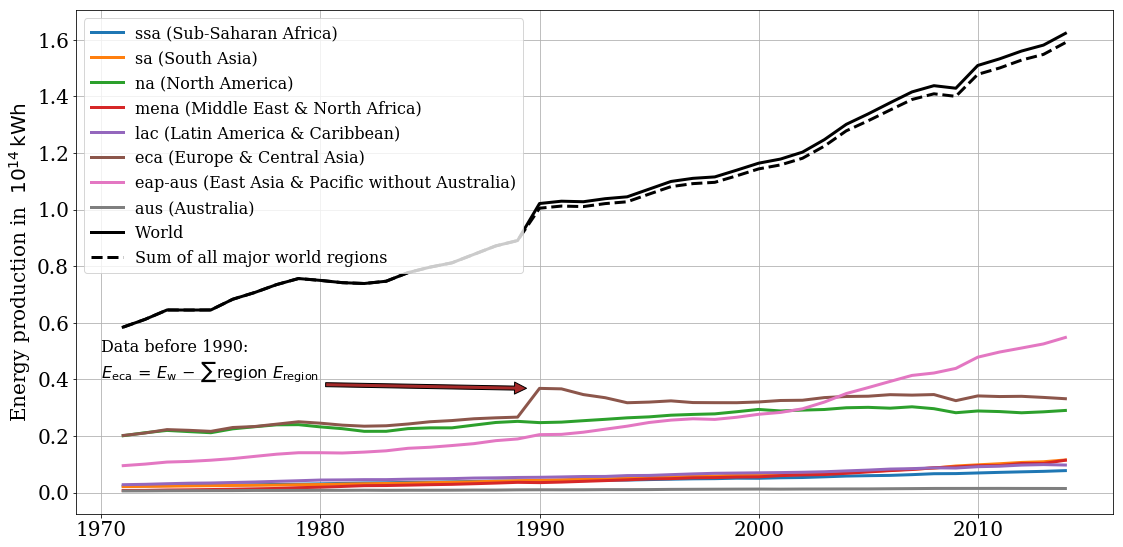

In [7]:
fig=plt.figure(figsize=(16,8))
ax=fig.add_subplot(111)
for num,i in enumerate(r[1:]):
    ax.plot(years, E_tot[i]*10**(-14), '-', label=r[num+1]+" ("+regions[num+1]+")", lw=3)
ax.plot(years, E_tot[r[0]]*10**(-14), '-k', label=regions[0], lw=3)
ax.plot(years, tot_E_sum*10**(-14), '--k', label='Sum of all major world regions', lw=3)
ax.legend(fontsize=16)
ax.set_ylabel(r"Energy production in  $10^{14}\,  {\rm kWh}$")
ax.grid()
ax.annotate("Data before 1990: \n"+
            r"$E_{ \rm eca} \, = \, E_{\rm w} \, - \, \sum{\rm region}\  E_{\rm region}$", 
            xy=(years[19]-0.4, E_tot['eca'][19]*10**(-14)), xytext=(1970,0.4),
            arrowprops=dict(facecolor='brown', shrink=0.02),fontsize=16)
print("Sum of all world regions / world energy consumption 2014 =  ", tot_E_sum[-1]/E_tot['w'][-1])
fig.tight_layout()
plt.savefig("E_WBdata.eps", format='eps', bbox_inches='tight')